In [150]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [151]:
digits = load_digits()

In [152]:
type(digits)

sklearn.utils.Bunch

In [153]:
digits_image = digits.images
digits_target = digits.target

In [154]:
print(digits_image.shape)
print(digits_target.shape)

(1797, 8, 8)
(1797,)


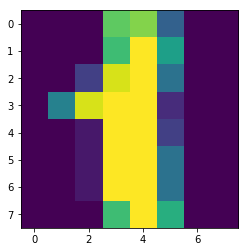

In [155]:
plt.imshow(digits_image[1])

In [156]:
images_and_labels = list(zip(digits_image,digits_target))

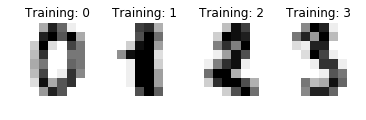

In [157]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [158]:
#flatten data 
digits_image_fea=digits_image.reshape((1797,-1))

In [159]:
digits_image_fea.shape

(1797, 64)

In [160]:
digits_image_fea

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [161]:
df = pd.DataFrame.from_records(digits_image_fea)

In [162]:
trainX,testX,trainY,testY=train_test_split(df,digits_target,random_state=2,test_size=0.2)

In [163]:
clf = SVC(gamma=0.001)

In [164]:
clf.fit(trainX,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
clf_pred=clf.predict(testX)

In [166]:
confusion_matrix(y_true=testY,y_pred=clf_pred)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 27]], dtype=int64)

In [167]:
accuracy_score(y_true=testY,y_pred=clf_pred)

0.98055555555555551

In [168]:
testX=testX.as_matrix()

In [169]:
testX=testX.reshape(360,8,8)

In [170]:
clf_pred.shape

(360,)

In [171]:
images_and_labels_pred = list(zip(testX,clf_pred))

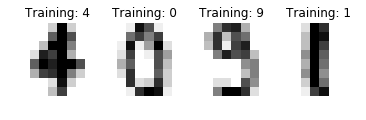

In [172]:
for index, (image, label) in enumerate(images_and_labels_pred[:4]):
    plt.subplot(2,4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)